In [1]:
import sys
sys.path.append('..')
from jaewook_header import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
IMG='../../input/images/'
MASK='../../input/masks/'
OUT='../../input/'
IMG_HEIGHT=IMG_WIDTH=512
seed=42

In [3]:
from tqdm import tqdm_notebook as tqdm

gl=glob(MASK+'*.png')
total=len(gl)
images=np.zeros((total,IMG_HEIGHT,IMG_WIDTH,1),dtype=np.float32)
masks=np.zeros((total,IMG_HEIGHT,IMG_WIDTH,7),dtype=np.float32)

bad=[]

for i,g in enumerate(tqdm(gl)):
    p,f=split(g)
    
    img=imread(join(IMG,f))
        
    H,W=img.shape
    before=(H-W)//2
    after=(H-W)-before
    
    img=np.pad(img,((0,0),(before,after)),'constant')
    
    images[i,:,:,0]=resize(img,
                           (IMG_HEIGHT,IMG_WIDTH),
                           anti_aliasing=True,
                           mode='constant')
    
    mask=resize(imread(g)[:,:,0]!=0,
                          (IMG_HEIGHT,IMG_WIDTH),
                          anti_aliasing=False,
                          mode='constant').astype(np.uint8)
    
    conn=cv2.connectedComponents(mask,None)
    
    if conn[0]!=8:
        bad.append(i)
    else:
        for j in range(7):
            masks[i,:,:,j]=(conn[1]==j+1)
    
print(images.shape[0],masks.shape[0])
images=np.delete(images,bad,axis=0)
masks=np.delete(masks,bad,axis=0)
print(images.shape[0],masks.shape[0])


69 69
68 68


In [11]:
def level(mask):
    if mask.ndim==4:
        return np.array([level(masks[i]) for i in range(masks.shape[0])])
    else:
        sv=(np.sum(mask,axis=2)!=0)
        h=np.sum(np.array([i*mask[:,:,i]/3 for i in range(7)]),axis=0)%1
        return hsv2rgb(np.dstack((h,sv,sv)))

C:\Users\snu\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


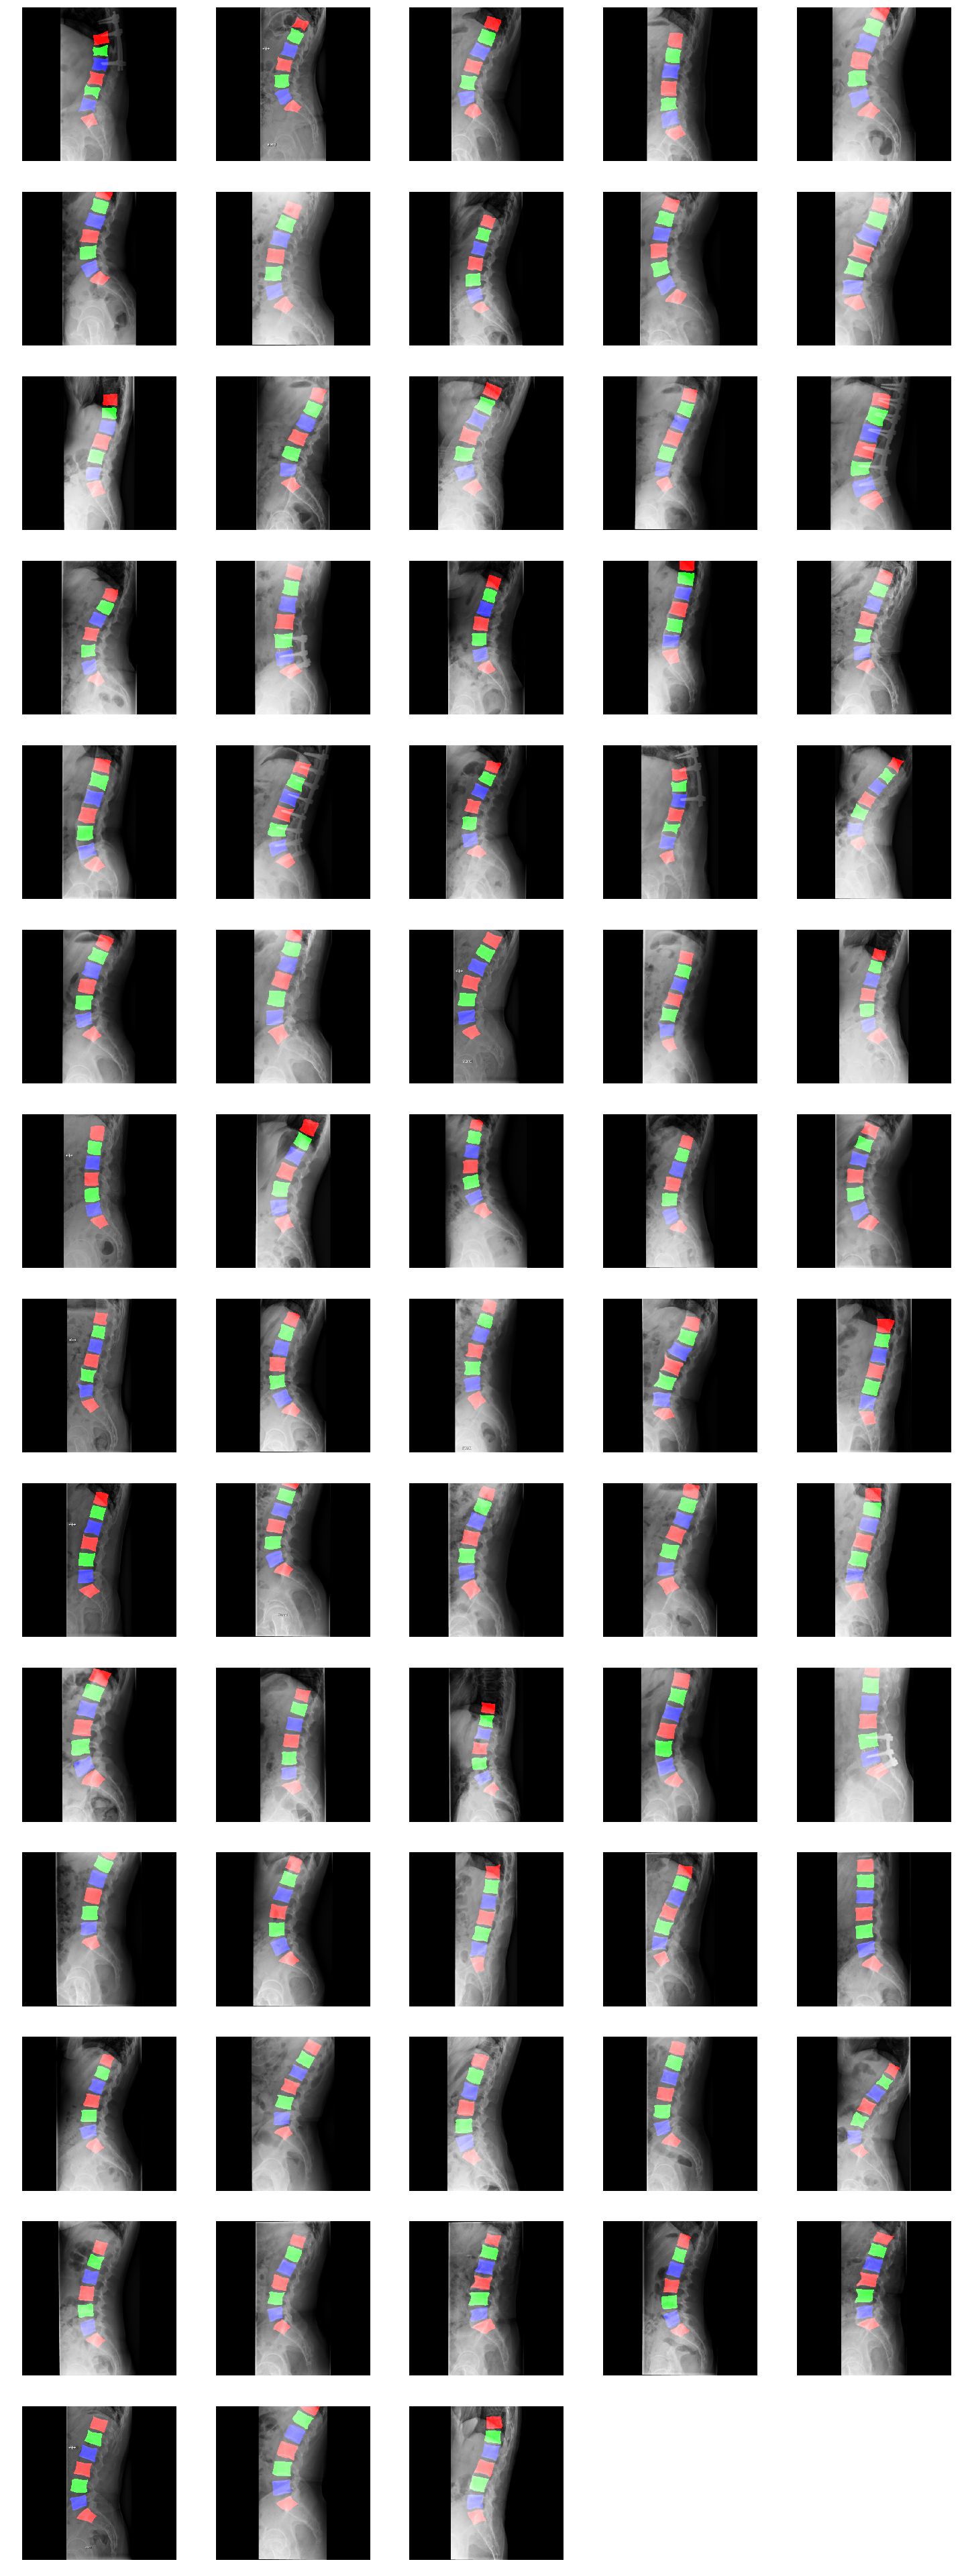

In [12]:
imshow2(overlay(images,level(masks)))

In [6]:
np.save('data1-L-images-conn',images)
np.save('data1-L-masks-conn',masks)